In [215]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import gensim.models.word2vec as w2v
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import os

In [216]:
model = w2v.Word2Vec.load(os.path.join("trained","HarryPotter.w2v"))

In [217]:
pca = PCA(n_components=2)
all_word_vectors = model.wv.syn0
all_word_vectors_2d = pca.fit_transform(all_word_vectors)

In [218]:
data  = pd.DataFrame(
    [
        (word,coords[0],coords[1])
        for word,coords in [
            (word,all_word_vectors_2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
        
    ],
    columns=["word", "x", "y"]
    )

data.head()

,word,x,y
0,raining,-0.444405,0.148386
1,yellow,-1.081844,0.073082
2,four,-0.190989,0.329587
3,rocketing,-0.274572,0.156059
4,woods,-0.275655,0.134534


In [219]:
sns.set_context("poster")

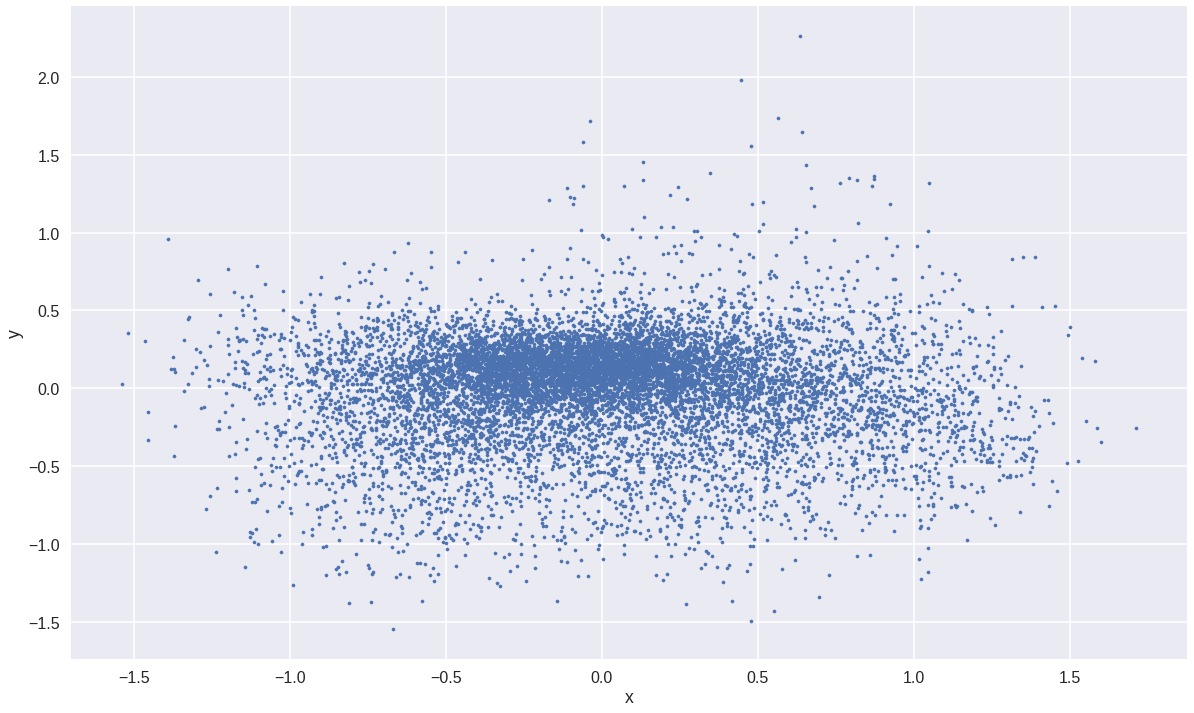

In [220]:
data.plot.scatter("x","y",s=10,figsize=(20,12))

In [221]:
def plot_region(x_bounds,y_bounds):
    slice = data[
        (x_bounds[0] <= data.x) &
        (data.x <= x_bounds[1]) & 
        (y_bounds[0] <= data.y) &
        (data.y <= y_bounds[1])
    ]
#     print slice
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

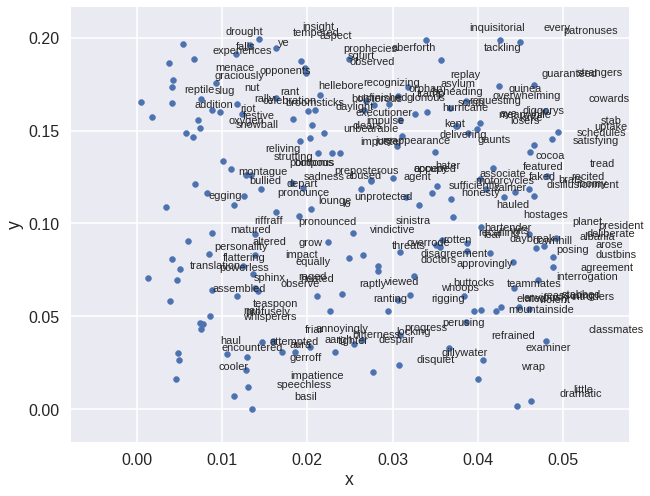

In [222]:
plot_region((0,0.05),(0,0.2))

In [223]:
model.most_similar("school")

[(u'hogwarts', 0.8415590524673462),
 (u'witchcraft', 0.732059121131897),
 (u'expulsion', 0.7192341685295105),
 (u'weekends', 0.7153775095939636),
 (u'headquarters', 0.712425947189331),
 (u'wizardry', 0.709296464920044),
 (u'tournament', 0.705825924873352),
 (u'shack', 0.7056856155395508),
 (u'public', 0.7028557062149048),
 (u'orphanage', 0.6929932236671448)]

In [224]:
model.most_similar("voldemort")

[(u'wormtail', 0.8020702004432678),
 (u'lord', 0.7414495944976807),
 (u'bellatrix', 0.7139783501625061),
 (u'prophecy', 0.7120527029037476),
 (u'thoughts', 0.7115651369094849),
 (u'james', 0.7054194211959839),
 (u'murder', 0.6874518990516663),
 (u'power', 0.6861509084701538),
 (u'killing', 0.6702994704246521),
 (u'pettigrew', 0.6630507707595825)]

In [225]:
model.most_similar("dumbledore")

[(u'slughorn', 0.7151566743850708),
 (u'lupin', 0.6860676407814026),
 (u'karkaroff', 0.6819849610328674),
 (u'headmaster', 0.6776529550552368),
 (u'severus', 0.6693336963653564),
 (u'fudge', 0.6689477562904358),
 (u'riddle', 0.6682482957839966),
 (u'scrimgeour', 0.6673592925071716),
 (u'firenze', 0.6623979210853577),
 (u'dippet', 0.6423855423927307)]

In [226]:
model.most_similar("quidditch")

[(u'match', 0.8615498542785645),
 (u'season', 0.7893391251564026),
 (u'team', 0.7620047330856323),
 (u'seeker', 0.7363142371177673),
 (u'cup', 0.7344024181365967),
 (u'winning', 0.7325237393379211),
 (u'practice', 0.7305669784545898),
 (u'game', 0.7296730279922485),
 (u'world', 0.7162207365036011),
 (u'played', 0.7102400064468384)]

In [227]:
def nearest_similar_cosine(s1,e1,e2):
    similarities = model.most_similar_cosmul(
    positive = [e2,s1],
    negative = [e1])
    
    s2 = similarities[0][0]
    print "%s is related to %s as %s is related to %s"%(s1,e1,s2,e2)
    return s2

In [228]:
nearest_similar_cosine("dumbledore", "headmaster", "potter")

dumbledore is related to headmaster as sir is related to potter


u'sir'